In [2]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
# from kiwipiepy import Kiwi

tqdm.pandas()

In [22]:
df = pd.read_csv('../Final_fire_news_5.csv')
df['Summarization']

0        ['31일 오후 9시 40분께 경기도 성남시 신분당선 판교역과 정자역 사이 선로에서...
1        ['남아프리카공화국에서 지난 크리스마스이브에 발생한 가스 트럭 폭발 사고와 관련, ...
2        ['선로 전기공급 차단 문제로 수서고속철도(SRT) 열차 운행이 이틀째 차질을 빚고...
3        ['선로 전기공급 차단 문제로 수서고속철도(SRT) 열차 운행이 이틀째 차질을 빚고...
4        ['선로 전기공급 차단 문제로 수서고속철도(SRT) 열차 운행이 이틀째 차질을 빚고...
                               ...                        
14052    ['소방청은 8일 한국가스안전공사와 수소 등 신에너지 관련 사고에 대응하기 위해 업...
14053    ["LGU+, 서울지하철 8호선에 '스마트 역사' 구축 LG유플러스가 서울 지하철 ...
14054    ["LG유플러스는 서울 지하철 8호선 18개 역사에 '스마트스테이션'을 구축하는 사...
14055    ['3일 이상의 휴업이 필요한 부상 사고의 20% 가까이가 제조업 운반·하역 작업에...
14056    ['3일 이상의 휴업이 필요한 부상 사고의 20% 가까이가 제조업 운반·하역 작업에...
Name: Summarization, Length: 14057, dtype: object

In [102]:
# year  = 2022
# month = 9
# day   = 7

# # no touch
# df['send_timestamp'] = pd.to_datetime(df['send_timestamp'])
# df['year'] = df['send_timestamp'].dt.year
# df['month'] = df['send_timestamp'].dt.month
# df['day'] = df['send_timestamp'].dt.day

# dfdf = df[(df.year == year) & (df.month == month) & (df.day == day)]
# dfdf.columns 

Index(['_index', '_type', '_id', '_score', 'YNewsML.Header.ContentID',
       'YNewsML.Metadata.Category.name', 'YNewsML.Metadata.Href',
       'YNewsML.Metadata.Class.ClassCode.name', 'YNewsML.NewsContent.Title',
       'YNewsML.NewsContent.Body', 'send_timestamp',
       'YNewsML.Metadata.Class.ClassCode', 'YNewsML.Metadata.Category', 'year',
       'month', 'day'],
      dtype='object')

In [23]:
df['Summarization']=df['Summarization'].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
df['Summarization']

0          31일 오후 9시 40분께 경기도 성남시 신분당선 판교역과 정자역 사이 선로에서...
1          남아프리카공화국에서 지난 크리스마스이브에 발생한 가스 트럭 폭발 사고와 관련  ...
2          선로 전기공급 차단 문제로 수서고속철도 SRT  열차 운행이 이틀째 차질을 빚고...
3          선로 전기공급 차단 문제로 수서고속철도 SRT  열차 운행이 이틀째 차질을 빚고...
4          선로 전기공급 차단 문제로 수서고속철도 SRT  열차 운행이 이틀째 차질을 빚고...
                               ...                        
14052      소방청은 8일 한국가스안전공사와 수소 등 신에너지 관련 사고에 대응하기 위해 업...
14053      LGU   서울지하철 8호선에  스마트 역사  구축 LG유플러스가 서울 지하철 ...
14054      LG유플러스는 서울 지하철 8호선 18개 역사에  스마트스테이션 을 구축하는 사...
14055      3일 이상의 휴업이 필요한 부상 사고의 20  가까이가 제조업 운반 하역 작업에...
14056      3일 이상의 휴업이 필요한 부상 사고의 20  가까이가 제조업 운반 하역 작업에...
Name: Summarization, Length: 14057, dtype: object

In [98]:
dfdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2122 entries, 0 to 2121
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   _index                                 2122 non-null   object        
 1   _type                                  2122 non-null   object        
 2   _id                                    2122 non-null   object        
 3   _score                                 0 non-null      float64       
 4   YNewsML.Header.ContentID               2122 non-null   object        
 5   YNewsML.Metadata.Category.name         1829 non-null   object        
 6   YNewsML.Metadata.Href                  2122 non-null   object        
 7   YNewsML.Metadata.Class.ClassCode.name  740 non-null    object        
 8   YNewsML.NewsContent.Title              2122 non-null   object        
 9   YNewsML.NewsContent.Body               2122 non-null   object  

In [99]:
dfdf = dfdf[[  'YNewsML.NewsContent.Title', 'YNewsML.NewsContent.Body', 'send_timestamp','YNewsML.Metadata.Href',
       'YNewsML.Metadata.Category','YNewsML.Metadata.Category.name','YNewsML.Metadata.Class.ClassCode','YNewsML.Metadata.Class.ClassCode.name']]
dfdf = dfdf[['YNewsML.NewsContent.Title', 'YNewsML.NewsContent.Body', 'send_timestamp','YNewsML.Metadata.Href' ]]

In [103]:
dfdf = dfdf.drop_duplicates()
dfdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   _index                                 2061 non-null   object        
 1   _type                                  2061 non-null   object        
 2   _id                                    2061 non-null   object        
 3   _score                                 0 non-null      float64       
 4   YNewsML.Header.ContentID               2061 non-null   object        
 5   YNewsML.Metadata.Category.name         1777 non-null   object        
 6   YNewsML.Metadata.Href                  2061 non-null   object        
 7   YNewsML.Metadata.Class.ClassCode.name  727 non-null    object        
 8   YNewsML.NewsContent.Title              2061 non-null   object        
 9   YNewsML.NewsContent.Body               2061 non-null   object  

## Clensing

In [104]:
def cleansing(body, mode=None):
    if type(body) == np.ndarray:
        body = np.round(body.tolist(), 5)
        body = body.tolist()
        return body
    else:
        body = re.sub('<YNAOBJECT.*?/YNAOBJECT>', '', body, 0, re.I|re.S) # YNAOBJECT 태그 제거
        body = re.sub('<table.*?/table>', '', body, 0, re.I|re.S) # table 태그 제거
        
        if mode == 'meta':
            try:
                body = body[re.search("\(.*?연합뉴스\).*?=", body).span()[0]:]
            except AttributeError:
                pass
            return body
        
        if mode == 'sum':
            try:
                body = body[re.search("\(.*?연합뉴스\).*?=", body).span()[1]:]
            except AttributeError:
                pass
            
        
        body = re.sub(r'\([^)]*\)', '', body, 0, re.I|re.S) # 괄호안 내용 제거
        body = re.sub(r'\[.*\]|\s-\s.*', '', body, 0, re.I|re.S) # 괄호안 내용 제거
        body = re.sub(r'\<.*\>|\s-\s.*', '', body, 0, re.I|re.S) # 괄호안 내용 제거
        body = re.sub('·', ' ', body, 0, re.I|re.S) # 변환
        body = re.sub('-', ' ', body, 0, re.I|re.S) # 변환
        body = re.sub('\(.*?연합뉴스\).*?=', '', body, 0, re.I|re.S) # 기자명 및 기자소속 제거
        body = re.sub('\(서울.*?연합뉴스\)', '', body, 0, re.I|re.S) # 기자소속 제거
        body = re.sub('yna.co.kr', '', body, 0, re.I|re.S) # 연합 url 제거
        body = re.sub('([a-zA-Z0-9\_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', '', body, 0, re.I|re.S) # E-mail 제거
        body = re.sub('(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', body, 0, re.I|re.S) # URL 제거
        body = re.sub('전문보기.*?\n', '', body, 0, re.I|re.S) # 전문보기 제거
        body = re.sub('&lt;.*?&gt;&gt;', '', body, 0, re.I|re.S) # 기타 안내문 제거
        body = re.sub('&lt;.*?&gt;', '', body, 0, re.I|re.S) # '&gt;'가 1개인 안내문 제거
        body = re.sub('&apos;', "'", body, 0, re.I|re.S) # &apos; ' 변환
        body = re.sub('&amp;', "&", body, 0, re.I|re.S) # &amp;; ' 변환        
        body = re.sub('-.*?_.*?\(끝\)', '', body, 0, re.I|re.S) # 9001887 속성에만 존재하는 불용어 제거
        body = re.sub('[#@*※|》■▲▼◀▶◇☎]-<>=+·↑', '', body, 0, re.I|re.S) # 특수문자 제거
        body = re.sub('…', '', body, 0, re.I|re.S) # … 제거
        body = re.sub('\(끝\)', '', body, 0, re.I|re.S) # 끝 태그 제거
        body = re.sub('[""]', '', body, 0, re.I|re.S) # "" 제거
        body = re.sub(r'[^ A-Za-z가-힣+]',' ' , body, 0, re.I|re.S) # 한글, 알파벳을 제외한 나머지 제거


        paragraphs = body.split('\r\n') # 단락 분리
        if ' 기자' in paragraphs[-1]: del paragraphs[-1] # 끝 단락 기자명 제거
        body = []
        for paragraph in paragraphs:
            paragraph = re.sub('\[.+?\]', '', paragraph, 0, re.I|re.S)
            paragraph = ' '.join(paragraph.split()) # 문자열 중간 다중 공백 제거
            if len(paragraph) > 0:
                body.append(paragraph)
        
        if mode == 'quot':
            return body
        else:
            return ' '.join(body)

In [107]:
dfdf = dfdf.drop_duplicates()
# df = df[['YNewsML.NewsContent.Title', 'YNewsML.NewsContent.Body', 'send_timestamp']]
dfdf['YNewsML.NewsContent.Body']

0       우크라 총사령관, 크림반도 러 공군비행장 공격 첫 인정\n미사일 공격 확인…"러 핵...
1       중대본 "시설 피해 1만3천725건…11명 사망·1명 실종"\n\r\n<YNAOBJ...
2       뉴욕증시, 반발 매수로 상승 출발\n\r\n    (뉴욕=연합뉴스) 윤영숙 연합인포...
3       감사원, '종편 재승인 점수' 고의감점 정황 포착\n\r\n<YNAOBJECT id...
4       서방·러 '눈에는 눈' 점입가경…EU, 러 가스도 가격상한제 검토(종합)\n기업 초...
                              ...                        
2056    이스라엘총리, F-35 전투기 앞에서 이란에 "시험하지 말라" 경고\n    \r\...
2057    중대본 "태풍에 12명 사망·실종"…주택 등 1만2천건 피해(종합2보)\n경북에 피...
2058    러, 트러스 총리 취임에 "비타협적 방식, 영국에 도움 안돼"\n"프랑스가 친구인지...
2059    빚 내서 에너지 요금 동결…영국 트러스 총리 첫 행보될 듯\n"가계 에너지 요금 동...
2060    [알림] 연합뉴스 콘텐츠 저작권 고지\n\n    연합뉴스가 제공하는 기사, 사진,...
Name: YNewsML.NewsContent.Body, Length: 2061, dtype: object

In [108]:
dfdf['clean_body'] = dfdf['YNewsML.NewsContent.Body'].progress_apply(cleansing)
dfdf['clean_body']

100%|██████████| 2061/2061 [00:00<00:00, 8128.95it/s]


0       우크라 총사령관 크림반도 러 공군비행장 공격 첫 인정 미사일 공격 확인러 핵무기 사...
1                                                        
2       뉴욕증시 반발 매수로 상승 출발 윤영숙 연합인포맥스 특파원 뉴욕증시는 연방준비제도의...
3                                                        
4                                                        
                              ...                        
2056    이스라엘총리 F 전투기 앞에서 이란에 시험하지 말라 경고 김상훈 특파원 이란 핵 합...
2057                                                     
2058                                                     
2059    빚 내서 에너지 요금 동결영국 트러스 총리 첫 행보될 듯 가계 에너지 요금 동결시 ...
2060    연합뉴스 콘텐츠 저작권 고지 연합뉴스가 제공하는 기사 사진 그래픽 영상 등 모든 콘...
Name: clean_body, Length: 2061, dtype: object

In [109]:
dfdf.columns

Index(['_index', '_type', '_id', '_score', 'YNewsML.Header.ContentID',
       'YNewsML.Metadata.Category.name', 'YNewsML.Metadata.Href',
       'YNewsML.Metadata.Class.ClassCode.name', 'YNewsML.NewsContent.Title',
       'YNewsML.NewsContent.Body', 'send_timestamp',
       'YNewsML.Metadata.Class.ClassCode', 'YNewsML.Metadata.Category', 'year',
       'month', 'day', 'clean_body'],
      dtype='object')

In [111]:
dfdf = df.dropna(subset = 'clean_body')
dfdf = df[df.clean_body != '']
dfdf #362

,_index,_type,_id,_score,YNewsML.Header.ContentID,YNewsML.Metadata.Category.name,YNewsML.Metadata.Href,YNewsML.Metadata.Class.ClassCode.name,YNewsML.NewsContent.Title,YNewsML.NewsContent.Body,send_timestamp,YNewsML.Metadata.Class.ClassCode,YNewsML.Metadata.Category,year,month,day,clean_body
0,rens_test,_doc,AKR20220907186500108,NaN,AKR20220907186500108,국제,https://www.yna.co.kr/view/AKR2022090718650010...,국제일반,"우크라 총사령관, 크림반도 러 공군비행장 공격 첫 인정","우크라 총사령관, 크림반도 러 공군비행장 공격 첫 인정\n미사일 공격 확인…""러 핵...",2022-09-07 23:59:24,NaN,NaN,2022,9,7,우크라 총사령관 크림반도 러 공군비행장 공격 첫 인정 미사일 공격 확인러 핵무기 사...
2,rens_test,_doc,AKR20220907185700009,NaN,AKR20220907185700009,NaN,https://www.yna.co.kr/view/AKR2022090718570000...,NaN,"뉴욕증시, 반발 매수로 상승 출발","뉴욕증시, 반발 매수로 상승 출발\n\r\n (뉴욕=연합뉴스) 윤영숙 연합인포...",2022-09-07 23:34:03,"[{'name': '해외증시'}, {'name': '국제일반'}]","[{'name': '국제'}, {'name': '경제'}]",2022,9,7,뉴욕증시 반발 매수로 상승 출발 윤영숙 연합인포맥스 특파원 뉴욕증시는 연방준비제도의...
17,rens_test,_doc,AKR20220907181400109,NaN,AKR20220907181400109,국제,https://www.yna.co.kr/view/AKR2022090718140010...,NaN,"사이버공격 당한 알바니아, 이란과 단교하고 외교관 추방","사이버공격 당한 알바니아, 이란과 단교하고 외교관 추방\n\r\n<YNAOBJECT...",2022-09-07 22:29:56,"[{'name': '국제일반'}, {'name': '첨단범죄'}]",NaN,2022,9,7,사이버공격 당한 알바니아 이란과 단교하고 외교관 추방 신창용 특파원 발칸반도의 소국...
27,rens_test,_doc,PYH20220907286500013,NaN,PYH20220907286500013,정치,https://www.yna.co.kr/view/PYH2022090728650001...,NaN,골드버그 미 대사와 면담하는 원희룡 국토장관,골드버그 미 대사와 면담하는 원희룡 국토장관\r\n (서울=연합뉴스) 원희룡 ...,2022-09-07 22:04:19,"[{'name': '외교일반'}, {'name': '중앙행정'}]",NaN,2022,9,7,골드버그 미 대사와 면담하는 원희룡 국토장관 원희룡 국토교통부 장관이 일 서울 중구...
28,rens_test,_doc,PYH20220907286400013,NaN,PYH20220907286400013,정치,https://www.yna.co.kr/view/PYH2022090728640001...,NaN,골드버그 미 대사와 면담하는 원희룡 국토장관,골드버그 미 대사와 면담하는 원희룡 국토장관\r\n (서울=연합뉴스) 원희룡 ...,2022-09-07 22:04:17,"[{'name': '외교일반'}, {'name': '중앙행정'}]",NaN,2022,9,7,골드버그 미 대사와 면담하는 원희룡 국토장관 원희룡 국토교통부 장관이 일 서울 중구...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,rens_test,_doc,AKR20220907001700088,NaN,AKR20220907001700088,국제,https://www.yna.co.kr/view/AKR2022090700170008...,NaN,"IAEA ""자포리자 원전에 보호구역 설정해야…당사국 동의 필요""","IAEA ""자포리자 원전에 보호구역 설정해야…당사국 동의 필요""\n""원전 곳곳 군사...",2022-09-07 01:42:03,"[{'name': '국제일반'}, {'name': '전쟁내전'}, {'name': ...",NaN,2022,9,7,IAEA 자포리자 원전에 보호구역 설정해야당사국 동의 필요 원전 곳곳 군사장비로 보...
2054,rens_test,_doc,PYH20220907000300013,NaN,PYH20220907000300013,사회,https://www.yna.co.kr/view/PYH2022090700030001...,사회일반,[알림] 연합뉴스 콘텐츠 저작권 고지,"[알림] 연합뉴스 콘텐츠 저작권 고지 \r\n 연합뉴스가 제공하는 기사, 사진...",2022-09-07 01:00:08,NaN,NaN,2022,9,7,연합뉴스 콘텐츠 저작권 고지 연합뉴스가 제공하는 기사 사진 그래픽 영상 등 모든 콘...
2056,rens_test,_doc,AKR20220907000400079,NaN,AKR20220907000400079,국제,https://www.yna.co.kr/view/AKR2022090700040007...,국제일반,"이스라엘총리, F-35 전투기 앞에서 이란에 ""시험하지 말라"" 경고","이스라엘총리, F-35 전투기 앞에서 이란에 ""시험하지 말라"" 경고\n \r\...",2022-09-07 00:52:39,NaN,NaN,2022,9,7,이스라엘총리 F 전투기 앞에서 이란에 시험하지 말라 경고 김상훈 특파원 이란 핵 합...
2059,rens_test,_doc,AKR20220906180100085,NaN,AKR20220906180100085,국제,https://www.yna.co.kr/view/AKR2022090618010008...,국제일반,빚 내서 에너지 요금 동결…영국 트러스 총리 첫 행보될 듯,"빚 내서 에너지 요금 동결…영국 트러스 총리 첫 행보될 듯\n""가계 에너지 요금 동...",2022-09-07 00:01:32,NaN,NaN,2022,9,7,빚 내서 에너지 요금 동결영국 트러스 총리 첫 행보될 듯 가계 에너지 요금 동결시 ...


## Clustering
클렌징 안하고 할게

### DBSCAN

- 밀도 차이 기반 알고리즘
- K-means clusterng과 달리 군집의 개수 k를 지정해줄 필요가 없으며, 알고리즘이 자체적으로 데이터 밀도 차이를 감지하여 군집을 생성
- 데이터 밀도가 자주 변하거나, 밀도 차이가 극명하지 않은 데이터에는 좋지않음
- 문맥을 고려하기 위해 TF-IDF Vectorization을 진행
- 중복 기사들끼리만 묶기 위해서, 군집화 기준을 까다롭게 설정하였다. 
    - epsilon 값은 0.1로 설정하여 군집 내부 유사도는 매우 높게 설정
    - min_samples 값을 1로 설정하여 군집 간 변별력을 낮춤

In [113]:
#1 tf-idf 임베딩(+Normalize)

from sklearn.feature_extraction.text import TfidfVectorizer

text = dfdf['clean_body'].tolist()

tfidf_vectorizer = TfidfVectorizer(min_df = 3, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector = tfidf_vectorizer.transform(text).toarray()

vector = np.array(vector)

In [114]:
#2 DBSCAN Clustering
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.1,min_samples=1, metric = "cosine") 
#     거리 계산 식으로는 Cosine distance를 이용
#     eps이 낮을수록, min_samples 값이 높을수록 군집으로 판단하는 기준이 까다로움.
result = model.fit_predict(vector)
dfdf['cluster1st'] = result

print('군집개수 :', result.max())
dfdf.columns

군집개수 : 285


Index(['_index', '_type', '_id', '_score', 'YNewsML.Header.ContentID',
       'YNewsML.Metadata.Category.name', 'YNewsML.Metadata.Href',
       'YNewsML.Metadata.Class.ClassCode.name', 'YNewsML.NewsContent.Title',
       'YNewsML.NewsContent.Body', 'send_timestamp',
       'YNewsML.Metadata.Class.ClassCode', 'YNewsML.Metadata.Category', 'year',
       'month', 'day', 'clean_body', 'cluster1st'],
      dtype='object')

In [116]:
#3 대표 기사 추출
def print_cluster_result(train):
    clusters = []
    counts = []
    top_title = []
    top_noun = []
    for cluster_num in set(result):
        # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
        # if(cluster_num == -1 or cluster_num == 0): 
        #     continue
        # else:
            # print("cluster num : {}".format(cluster_num))
            temp_df = train[train['cluster1st'] == cluster_num] # cluster num 별로 조회
            clusters.append(cluster_num)
            counts.append(len(temp_df))
            top_title.append(temp_df.reset_index()['YNewsML.NewsContent.Title'][0])
            top_noun.append(temp_df.reset_index()['clean_body'][0]) # 군집별 첫번째 기사를 대표기사로 ; tfidf방식
            # for title in temp_df['YNewsML.NewsContent.Title']:
            #     print(title) # 제목으로 살펴보자
            # print()
    cluster_result = pd.DataFrame({'cluster_num':clusters, 'count':counts, 'top_title':top_title, 'top_noun':top_noun})
    return cluster_result

cluster1_result = print_cluster_result(dfdf)
cluster1_result

,cluster_num,count,top_title,top_noun
0,0,1,"우크라 총사령관, 크림반도 러 공군비행장 공격 첫 인정",우크라 총사령관 크림반도 러 공군비행장 공격 첫 인정 미사일 공격 확인러 핵무기 사...
1,1,1,"뉴욕증시, 반발 매수로 상승 출발",뉴욕증시 반발 매수로 상승 출발 윤영숙 연합인포맥스 특파원 뉴욕증시는 연방준비제도의...
2,2,1,"사이버공격 당한 알바니아, 이란과 단교하고 외교관 추방",사이버공격 당한 알바니아 이란과 단교하고 외교관 추방 신창용 특파원 발칸반도의 소국...
3,3,3,골드버그 미 대사와 면담하는 원희룡 국토장관,골드버그 미 대사와 면담하는 원희룡 국토장관 원희룡 국토교통부 장관이 일 서울 중구...
4,4,1,[속보] 오후 9시까지 전국 6만9992명 확진…어제보다 1만2252명 적어,오후 시까지 전국 만 명 확진어제보다 만 명 적어
...,...,...,...,...
281,281,1,빚 내서 에너지요금 상승 억제…영국 트러스 총리 첫 행보될 듯(종합),빚 내서 에너지요금 상승 억제영국 트러스 총리 첫 행보될 듯 가계 에너지 요금 연 ...
282,282,1,"리즈 트러스 총리 취임 ""폭풍우 헤치고 경제 재건하겠다""(종합)",리즈 트러스 총리 취임 폭풍우 헤치고 경제 재건하겠다 경제 에너지 위기 NHS 우선...
283,283,1,"IAEA ""자포리자 원전에 보호구역 설정해야…당사국 동의 필요""",IAEA 자포리자 원전에 보호구역 설정해야당사국 동의 필요 원전 곳곳 군사장비로 보...
284,284,1,"이스라엘총리, F-35 전투기 앞에서 이란에 ""시험하지 말라"" 경고",이스라엘총리 F 전투기 앞에서 이란에 시험하지 말라 경고 김상훈 특파원 이란 핵 합...


### K-Means Clustering
- k-Means Clustering은 사전에 군집의 개수 k를 설정해주어야 한다. 
- 앞서 DBSCAN을 이용해 구축한 311개의 뉴스 기사 데이터를 다시 TF-IDF Vectorization 한 후, K-Means Clustering 기법을 이용
- k개의 군집은 각 하나의 중심점을 가지고, 각 데이터는 가까운 중심점에 할당된다.
- 각 군집과 데이터 간의 거리 분산을 최소화하는 방식으로 클러스터링이 진행된다.
- 최적의 군집 개수를 찾기 위해 두가지 방법을 고려하였다.

- Elbow Method
  - 첫 번째로는 클러스터 내의 총 변동을 설명하는 WCSS(Within Clusters Sum of Squares)를 이용하는 Elbow Method이다. 
  - 각 클러스터를 WCSS 방법으로 계산한 뒤, SSE가 가장 급격하게 줄어드는 구간에서 군집 개수 k를 결정하는 방법이다.
  - 하지만 거의 일정한 SSE 감소율로 인해 적합한 k를 결정하기에는 어려웠다.

- Silhouette Score
  - 두 번째로 고려한 방법은 다른 클러스터(seperation)에 비해 자신의 클러스터(cohesion)와의 유사도를 측도로 하는 Silhouette Score
  - 값이 높으면 객체가 자체 클러스터와 잘 일치하고 인접 클러스터와 잘 일치하지 않음을 나타낸다.
  - 실루엣 계수가 가장 높은 k=29이 최적 군집 개수라고 판단
  - 따라서 cluster 0부터 cluster 28까지, 총 29개의 군집으로 311개의 기사를 분류

In [117]:
#1 tf-idf 임베딩(+Normalize)

from sklearn.feature_extraction.text import TfidfVectorizer

text = cluster1_result['top_noun'].tolist()

tfidf_vectorizer = TfidfVectorizer(min_df = 3, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector_2nd = tfidf_vectorizer.transform(text).toarray()

vector_2nd = np.array(vector_2nd)
vector_2nd

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04959367, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

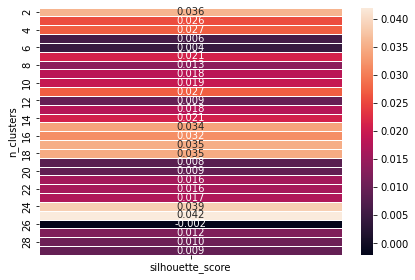

In [118]:
# 2-1. Elbow Method
# ..
# 2-2. Silhouette Score - 최적 k
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,30)
    results = []

    for i in clusters_range:
      # 군집화 수행
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(vector_2nd) # 가장 높은 실루엣 계수와 매핑되는 k = 28 : 0.063

In [119]:
#3 K-Means Clustering

from sklearn.cluster import KMeans

result_2nd = KMeans(n_clusters=25).fit_predict(vector_2nd)
cluster1_result['cluster2nd'] = result_2nd

cluster1_result

,cluster_num,count,top_title,top_noun,cluster2nd
0,0,1,"우크라 총사령관, 크림반도 러 공군비행장 공격 첫 인정",우크라 총사령관 크림반도 러 공군비행장 공격 첫 인정 미사일 공격 확인러 핵무기 사...,1
1,1,1,"뉴욕증시, 반발 매수로 상승 출발",뉴욕증시 반발 매수로 상승 출발 윤영숙 연합인포맥스 특파원 뉴욕증시는 연방준비제도의...,1
2,2,1,"사이버공격 당한 알바니아, 이란과 단교하고 외교관 추방",사이버공격 당한 알바니아 이란과 단교하고 외교관 추방 신창용 특파원 발칸반도의 소국...,1
3,3,3,골드버그 미 대사와 면담하는 원희룡 국토장관,골드버그 미 대사와 면담하는 원희룡 국토장관 원희룡 국토교통부 장관이 일 서울 중구...,1
4,4,1,[속보] 오후 9시까지 전국 6만9992명 확진…어제보다 1만2252명 적어,오후 시까지 전국 만 명 확진어제보다 만 명 적어,1
...,...,...,...,...,...
281,281,1,빚 내서 에너지요금 상승 억제…영국 트러스 총리 첫 행보될 듯(종합),빚 내서 에너지요금 상승 억제영국 트러스 총리 첫 행보될 듯 가계 에너지 요금 연 ...,6
282,282,1,"리즈 트러스 총리 취임 ""폭풍우 헤치고 경제 재건하겠다""(종합)",리즈 트러스 총리 취임 폭풍우 헤치고 경제 재건하겠다 경제 에너지 위기 NHS 우선...,1
283,283,1,"IAEA ""자포리자 원전에 보호구역 설정해야…당사국 동의 필요""",IAEA 자포리자 원전에 보호구역 설정해야당사국 동의 필요 원전 곳곳 군사장비로 보...,9
284,284,1,"이스라엘총리, F-35 전투기 앞에서 이란에 ""시험하지 말라"" 경고",이스라엘총리 F 전투기 앞에서 이란에 시험하지 말라 경고 김상훈 특파원 이란 핵 합...,1


In [120]:
#4 대표 기사 추출
def print_cluster_result(train):
    clusters = []
    counts = []
    top_title = []
    top_noun = []
    for cluster_num in set(result_2nd):
        # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
        # if(cluster_num == -1 or cluster_num == 0): 
        #     continue
        # else:
            # print("cluster num : {}".format(cluster_num))
            temp_df = train[train['cluster2nd'] == cluster_num] # cluster num 별로 조회
            clusters.append(cluster_num)
            counts.append(len(temp_df))
            top_title.append(temp_df.reset_index()['top_title'][0])
            top_noun.append(temp_df.reset_index()['top_noun'][0]) # 군집별 첫번째 기사를 대표기사로 ; tfidf방식
            # for title in temp_df['YNewsML.NewsContent.Title']:
            #     print(title) # 제목으로 살펴보자
            # print()
    cluster_result = pd.DataFrame({'cluster_num':clusters, 'count':counts, 'top_title':top_title, 'top_noun':top_noun})
    return cluster_result

cluster2_result = print_cluster_result(train=cluster1_result)
cluster2_result

,cluster_num,count,top_title,top_noun
0,0,2,"삼성디스플레이, 대학 캠퍼스서 14일까지 채용 로드쇼 진행",삼성디스플레이 대학 캠퍼스서 일까지 채용 로드쇼 진행 삼성디스플레이가 지난 일부터 ...
1,1,209,"우크라 총사령관, 크림반도 러 공군비행장 공격 첫 인정",우크라 총사령관 크림반도 러 공군비행장 공격 첫 인정 미사일 공격 확인러 핵무기 사...
2,2,3,[부고] 황희종(전 순천 매산고 진학부장 교사) 씨 별세,황희종 씨 별세 황희종 씨 별세 황영상 은상 씨 부친상 이희재 씨 시부상 일 오후 ...
3,3,5,중소기업인과 간담회 하는 이창양 산업부 장관,중소기업인과 간담회 하는 이창양 산업부 장관 이창양 산업통상자원부 장관이 일 오후 ...
4,4,3,"북한, '전국 도대항군중체육대회-2022' 진행",북한 전국 도대항군중체육대회 진행 북한 전국 도대항군중체육대회 가 연일 진행되고 있...
5,5,6,대회사 하는 서상목 회장,대회사 하는 서상목 회장 일 서울 마포구 서울가든호텔에서 열린 제 회 사회복지의 날...
6,6,2,빚 내서 에너지요금 상승 억제…영국 트러스 총리 첫 행보될 듯(종합),빚 내서 에너지요금 상승 억제영국 트러스 총리 첫 행보될 듯 가계 에너지 요금 연 ...
7,7,3,[영상] 30cm 공간서 14시간 사투…포항 생존자들 '이것'잡고 버텨 냈다,cm 공간서 시간 사투포항 생존자들 이것 잡고 버텨 냈다 황토물이 폭포수처럼 쏟아졌...
8,8,3,브리핑하는 박향 총괄반장,브리핑하는 박향 총괄반장 박향 보건복지부 중앙사고수습본부 방역총괄반장이 일 정부세종...
9,9,3,"우크라 ""자포리자 원전 안전 위해 필요시 폐쇄도 검토""",우크라 자포리자 원전 안전 위해 필요시 폐쇄도 검토 러시아군 철수하고 유엔 평화유지...


# 키워드 추출


### KeyBERT
- 군집 내의 모든 타이틀을 하나의 텍스트로 이어 KeyBERT 모델에 넣었고, '전체 문장'과 가장 유사한 키워드를 추출
- 워드임베딩 방식을 포함해서 다양한 임베딩 모델을 지원했는데, sentence-tansformer 방식 중, paraphrase-multilingual-MiniLM-L12-v2 모델을 사용
- Manual Search로 keyphrase_ngram_range, use_mmr, diversity, use_maxsum, nr_candidate 등의 하이퍼파라미터를 조정
- 워드 추출 결과를 확인해본 결과, 인접한 하나나 두 개의 단어로 이루어진 후보군들 중에서 코사인 유사도를 기반으로 키워드를 추출하는 방식이 가장 좋은 성능을 보였다.

In [122]:
!pip install keybert

In [123]:
from keybert import KeyBERT

key_model = KeyBERT('paraphrase-multilingual-MiniLM-L12-v2')  #distilbert-base-nli-mean-tokens / paraphrase-multilingual-MiniLM-L12-v2

OSError: /home/intern2/anaconda3/envs/intern/lib/python3.9/site-packages/nvidia/cublas/lib/libcublas.so.11: symbol cublasLtHSHMatmulAlgoInit version libcublasLt.so.11 not defined in file libcublasLt.so.11 with link time reference